---
format: 
  html:
    toc: true
execute:
  echo: true
---

# Explore the Universal Thermal Climate Index (UTCI) data of Philadelphia

The study area is Philadelphia, Pennsylvania, USA, a major urban center with diverse urban characteristics. Philadelphia is the sixth-most populous city in the U.S. and is known for its dense urban layout, historical architecture, and significant variation in neighborhood demographics and infrastructure. The city comprises 408 census tracts, which serve as fundamental spatial units for analyzing urban environmental variables. 

The Universal Thermal Climate Index (UTCI) is a comprehensive metric used to assess outdoor thermal comfort and human heat stress under varying climatic conditions. Unlike simple temperature measures, UTCI integrates air temperature, humidity, wind speed, and radiant heat to evaluate the perceived temperature's impact on the human body. Widely applied in urban planning, climate studies, and public health, UTCI provides a standardized and globally applicable framework for understanding how environmental factors influence human thermal comfort and well-being.

1. **Show the UTCI data map of Philadelphia** <br>
The spatio-temporal distribution of the UTCI from 8 a.m. to 7 p.m. in Philadelphia reveals significant diurnal variations in heat stress across the city. UTCI values begin relatively low in the early morning at 8 a.m., with values ranging from approximately [27.9]∘ C to [33.4]∘ C. As the day progresses, UTCI values steadily increase, peaking around midday and early afternoon (12 p.m. to 3 p.m.), reaching maximum levels between [37.0]∘ C and [38.9]∘ C. During these peak hours, large portions of the city experience heightened heat stress, especially in areas with vacant land and less vegetation in Northeast Philadelphia. By late afternoon (4 p.m. onward), UTCI values begin to decrease gradually, with noticeable reductions in heat stress by 6 p.m. and continuing into the evening hours. At 7 p.m., the UTCI drops to values between [26.3]∘ C and [30.6]∘ C, reflecting the cooling effect as solar radiation diminishes. This temporal pattern demonstrates the peak heat exposure period in the early afternoon and emphasizes the importance of targeted interventions during these high-risk hours to mitigate heat stress impacts in vulnerable urban areas

![Fig 1. Analysis of UTCI data in Philadelphia](../images/ST_DISTRIBUTION.jpg)

2. **Show the Bus Stop data map of Philadelphia** <br>
Philadelphia's public transit system, operated by the Southeastern Pennsylvania Transportation Authority (SEPTA), includes 145 bus routes and 8,126 bus stops across the city, providing extensive coverage and accessibility for residents. This extensive network of bus stops presents an ideal context for studying heat stress at the transit micro-level. Philadelphia’s spatial diversity offers a robust basis for examining the relationship between heat stress around bus stops and the surrounding environment, providing insights into equitable urban planning and transit policy

![Fig 2. Bus Stops in Philadephia](../images/BusStops.png)

3. **Show the Bus Stop heat stress map of Philadelphia** <br>
First, We want to explore 

Note: you may need to restart the kernel to use updated packages.


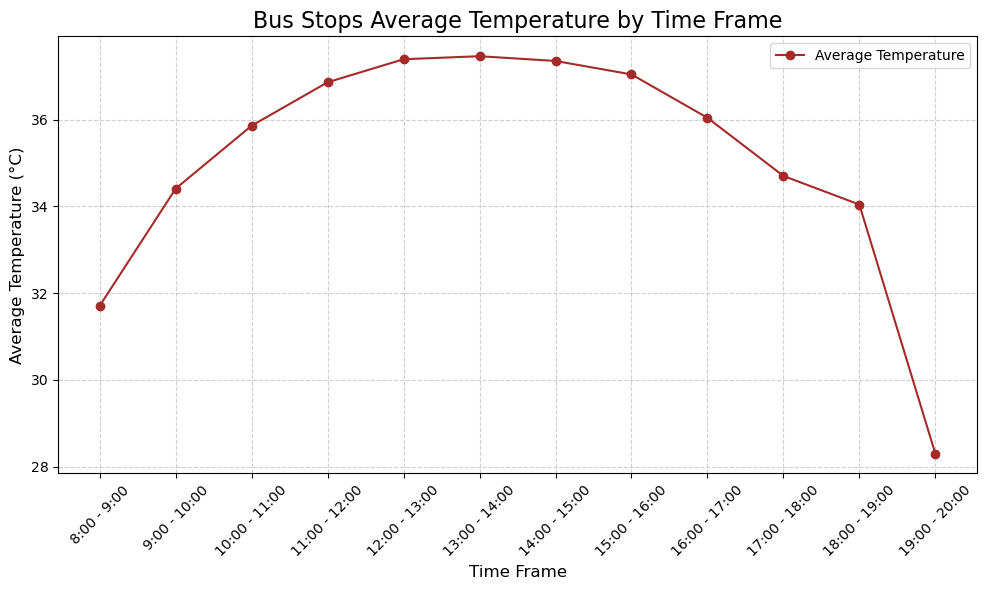

In [4]:
%pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file("C:/Users/25077/Final/data/2020_PA_stops_buffer3_UTCI.geojson")

# Convert MULTIPOLYGON geometries to their centroids
gdf['geometry'] = gdf.geometry.centroid

# Reproject to WGS 84 (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# List of time frames (column names in the GeoDataFrame)
time_frames = [f'{hour}_mean' for hour in range(8, 20)]  # From 8 AM to 7 PM

# Calculate the average temperature for each time frame
average_temperatures = {time: gdf[time].mean() for time in time_frames}

import matplotlib.pyplot as plt

# Data for average temperatures
time_frames = [
    "8:00 - 9:00", "9:00 - 10:00", "10:00 - 11:00", "11:00 - 12:00",
    "12:00 - 13:00", "13:00 - 14:00", "14:00 - 15:00", "15:00 - 16:00",
    "16:00 - 17:00", "17:00 - 18:00", "18:00 - 19:00", "19:00 - 20:00"
]
average_temperatures = [
    31.71, 34.41, 35.86, 36.86, 37.39, 37.46, 37.35, 37.04,
    36.04, 34.70, 34.04, 28.30
]

# Plot the chart
plt.figure(figsize=(10, 6))
plt.plot(time_frames, average_temperatures, marker='o', color='brown', label='Average Temperature')

# Add chart labels and title
plt.title("Bus Stops Average Temperature by Time Frame", fontsize=16)
plt.xlabel("Time Frame", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()


4. Explore 1: in each time frame, which is the highest-temp bus stop and which is the lowest temp.
5. Explore 2: which bus stop has the highest avg temp.